# **PROJET BIO-INFO : L'impact de la hausse des températures sur la puissance des ouragans**

# Membres du groupe:

- Anderson TESS
- Fiacre MITOKPE
- Kenny RUFFINE
- Gneneman Stéphane Jean-Baptiste KONÉ 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns      

In [17]:
#Dataset sur les cyclones (certaines lignes ont plus de virgules, c'est pourquoi on "skip" dans les bad_lines)
df2 = pd.read_csv("storms (1).csv", sep=",", engine="python", on_bad_lines="skip")
df2 = df2.drop(columns=["tropicalstorm_force_diameter", "hurricane_force_diameter", "pressure"]) # colonnes qu'on veut supprimer
df2 = df2[df2["status"] == "hurricane"] # on regarde que les ouragans pour le moment

# On garde que les moments min et max du vent pour chaque ouragan
df2["wind"] = pd.to_numeric(df2["wind"], errors="coerce")


In [14]:
# MAX WIND SPEEDS
df2_max = df2.loc[df2.groupby("name")["wind"].idxmax()] # on groupe les ouragans par nom, puis on garde le moment ou le vent est au max

# On trie le dataset par annee
df2_max = df2_max.sort_values(by="year", ascending=True) 

# on reset l'index pour faire plus propre
df2_max = df2_max.reset_index(drop=True)

# on affiche le dataset
df2_max

,name,year,month,day,hour,lat,long,status,category,wind
0,Doris,1975,9,2,6,36.4,-44.5,hurricane,2.0,95
1,Caroline,1975,8,31,0,24.0,-97.0,hurricane,3.0,100
2,Eloise,1975,9,23,12,30.2,-86.3,hurricane,3.0,110
3,Blanche,1975,7,27,18,37.9,-68.0,hurricane,1.0,75
4,Gladys,1975,10,2,12,35.3,-69.8,hurricane,4.0,120
...,...,...,...,...,...,...,...,...,...,...
171,Larry,2021,9,4,6,15.8,-44.0,hurricane,3.0,110
172,Fiona,2022,9,21,6,23.5,-71.8,hurricane,4.0,120
173,Ian,2022,9,28,12,26.0,-82.7,hurricane,5.0,140
174,Martin,2022,11,2,18,36.1,-48.9,hurricane,1.0,75


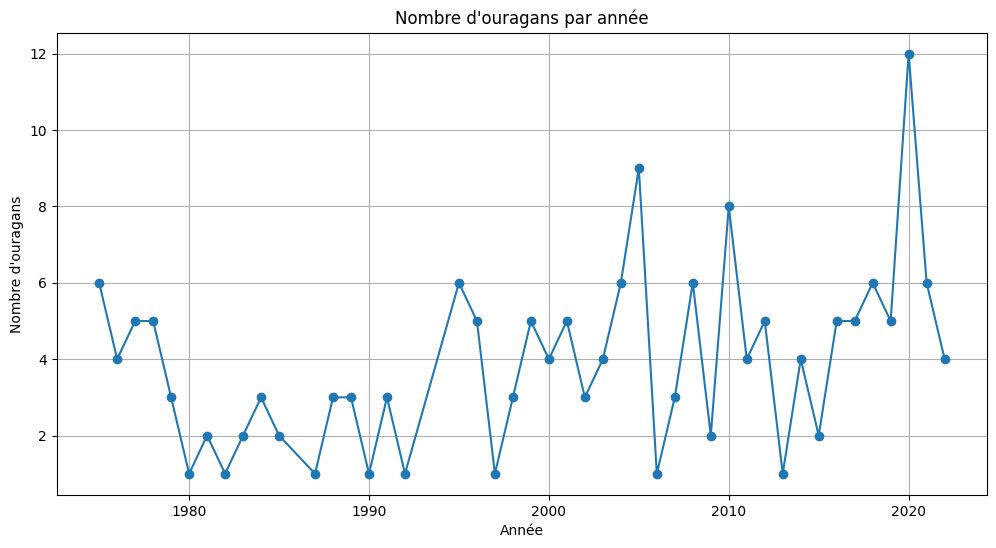

In [18]:
# Comptage du nombre d'ouragans par année
hurricanes_per_year = df2_max["year"].value_counts().sort_index()

# Tracé du graphique
plt.figure(figsize=(12, 6))
plt.plot(hurricanes_per_year.index, hurricanes_per_year.values, marker='o', linestyle='-')
plt.xlabel("Année")
plt.ylabel("Nombre d'ouragans")
plt.title("Nombre d'ouragans par année")
plt.grid(True)
plt.show()

In [15]:

# MIN WIND SPEEDS
df2_min = df2.loc[df2.groupby("name")["wind"].idxmin()] # on groupe les ouragans par nom, puis on garde le moment ou le vent est au max

# On trie le dataset par annee
df2_min = df2_min.sort_values(by="year", ascending=True) 

# on reset l'index pour faire plus propre
df2_min = df2_min.reset_index(drop=True)

# on affiche le dataset
df2_min


,name,year,month,day,hour,lat,long,status,category,wind
0,Caroline,1975,8,30,0,23.3,-94.2,hurricane,1.0,65
1,Doris,1975,8,31,0,34.9,-46.3,hurricane,1.0,65
2,Blanche,1975,7,27,6,35.9,-70.0,hurricane,1.0,65
3,Faye,1975,9,26,0,26.5,-60.0,hurricane,1.0,65
4,Gladys,1975,9,25,18,15.8,-44.0,hurricane,1.0,65
...,...,...,...,...,...,...,...,...,...,...
171,Larry,2021,9,2,6,13.0,-31.6,hurricane,1.0,65
172,Elsa,2021,7,2,12,13.0,-59.8,hurricane,1.0,65
173,Ian,2022,9,26,6,17.7,-81.7,hurricane,1.0,65
174,Fiona,2022,9,18,12,17.2,-66.2,hurricane,1.0,65


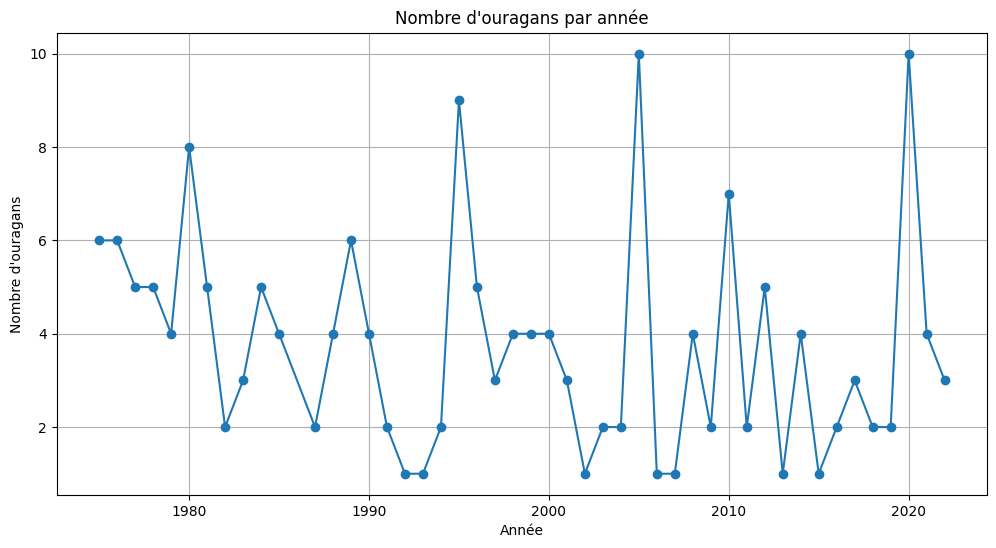

In [19]:
# Comptage du nombre d'ouragans par année
hurricanes_per_year = df2_min["year"].value_counts().sort_index()

# Tracé du graphique
plt.figure(figsize=(12, 6))
plt.plot(hurricanes_per_year.index, hurricanes_per_year.values, marker='o', linestyle='-')
plt.xlabel("Année")
plt.ylabel("Nombre d'ouragans")
plt.title("Nombre d'ouragans par année")
plt.grid(True)
plt.show()

In [16]:

def get_hurricane_data_by_index(df, index):
    """
    retourne une seule ligne du dataset en fonction de l'indice donné en paramètre.

    Paramètres:
    df (DataFrame): dataset des ouragans.
    index (int): indice de la ligne à recupérer.

    Returns:
    str : Une str Pandas contenant l'année, le mois, le jour, la latitude, la longitude et la catégorie, 
            ou un message d'erreur si l'index dépasse la taille du dataset.
    """

    required_columns = {"year", "month", "day", "lat", "long", "category"}

    if not required_columns.issubset(df.columns):
        return "Error: The dataset does not contain all the required columns."

    if index < 0 or index >= len(df):
        return "Error: Index out of range."

    return df.loc[index, ["year", "month", "day", "lat", "long", "category"]]


index = 5  
hurricane_data = get_hurricane_data_by_index(df2_max, index)
print(hurricane_data)


#même fonction mais stockée dans une array numpy


def get_hurricane_data_as_numpy(df,index):
    """
    retourne un array de type numpy.

    Paramètres:
    df (DataFrame): dataset des ouragans.
    index (int): indice de la ligne à recupérer

    retours:
    numpy.ndarray: un NumPy qui contient l'année, le mois, le jour, la latitude, la longitude, et la categorie d'un ouragan.
    """
    required_columns = {"year", "month", "day", "lat", "long", "category"}

    if not required_columns.issubset(df.columns):
        return "Error: The dataset does not contain all the required columns."

    if index < 0 or index >= len(df):
        return "Error: Index out of range."

    return df.loc[index, ["year", "month", "day", "lat", "long", "category"]].to_numpy()

index = 5  
hurricane_data_array = get_hurricane_data_as_numpy(df2_max,index)
print(hurricane_data_array)



year        1975
month          9
day           27
lat         32.7
long       -64.2
category     2.0
Name: 5, dtype: object
[np.int64(1975) np.int64(9) np.int64(27) np.float64(32.7)
 np.float64(-64.2) np.float64(2.0)]
